In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [2]:
df=pd.read_csv("coursera data.csv")


In [3]:
df.shape

(891, 7)

In [4]:
df.columns

Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0                    int64
course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

In [6]:
df.describe(include="all")

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
count,891.000000,891,891,891,891.000000,891,891
unique,NaN,888,154,3,NaN,4,205
top,NaN,Developing Your Musicianship,University of Pennsylvania,COURSE,NaN,Beginner,120k
freq,NaN,2,59,582,NaN,487,22
mean,445.000000,NaN,NaN,NaN,4.677329,NaN,NaN
std,257.353842,NaN,NaN,NaN,0.162225,NaN,NaN
min,0.000000,NaN,NaN,NaN,3.300000,NaN,NaN
25%,222.500000,NaN,NaN,NaN,4.600000,NaN,NaN
50%,445.000000,NaN,NaN,NaN,4.700000,NaN,NaN
75%,667.500000,NaN,NaN,NaN,4.800000,NaN,NaN


In [7]:
df.isnull().sum()

Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [8]:
df['course_students_enrolled']=df['course_students_enrolled'].replace({'k': '*1e3', 'm': '*1e6'}, regex=True).map(pd.eval).astype(int)

# what are the different coursera organisations,course title, course certificate types etc?

In [9]:
df.columns

Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled'],
      dtype='object')

In [10]:
df["course_organization"].values

array(['(ISC)²', 'University of Pennsylvania', 'Johns Hopkins University',
       'Yale University', 'Indian School of Business',
       'University at Buffalo', 'deeplearning.ai', 'deeplearning.ai',
       'IBM', 'deeplearning.ai', 'deeplearning.ai', 'deeplearning.ai',
       'Amazon Web Services', 'Amazon Web Services',
       'Amazon Web Services', 'Amazon Web Services',
       'Amazon Web Services', 'University of Toronto',
       'University of California, Irvine',
       'University of Illinois at Urbana-Champaign', '(ISC)²',
       'University of Pennsylvania', 'University of Michigan',
       'University of Pennsylvania',
       'Universidad Nacional Autónoma de México', 'Yale University',
       'University of Colorado Boulder', 'IBM',
       'National Research University Higher School of Economics',
       'Google Cloud', 'Erasmus University Rotterdam', 'Duke University',
       'Yale University', 'University of Virginia',
       'University of Virginia', 'Atlassian', 'ScrumT

In [11]:
df["course_title"].values

array(['(ISC)² Systems Security Certified Practitioner (SSCP)',
       'A Crash Course in Causality:  Inferring Causal Effects from Observational Data',
       'A Crash Course in Data Science', "A Law Student's Toolkit",
       'A Life of Happiness and Fulfillment',
       'ADHD: Everyday Strategies for Elementary Students',
       'AI For Everyone', 'AI For Medical Treatment',
       'AI Foundations for Everyone', 'AI for Medical Diagnosis',
       'AI for Medical Prognosis', 'AI for Medicine', 'AWS Fundamentals',
       'AWS Fundamentals: Addressing Security Risk',
       'AWS Fundamentals: Building Serverless Applications',
       'AWS Fundamentals: Going Cloud-Native',
       'AWS Fundamentals: Migrating to the Cloud',
       'Aboriginal Worldviews and Education', 'Academic English: Writing',
       'Accelerated Computer Science Fundamentals', 'Access Controls',
       'Accounting Analytics', 'Accounting for Decision Making',
       'Achieving Personal and Professional Success',
  

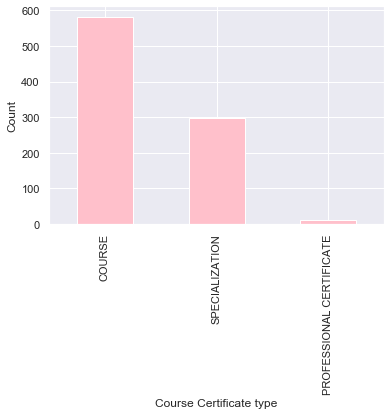

In [12]:
df["course_Certificate_type"].value_counts().plot(kind="bar",color="Pink")
plt.xlabel("Course Certificate type")
plt.ylabel("Count")
plt.show()

# is there any relation between no of students enrolled and rating?

In [13]:
df.columns

Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled'],
      dtype='object')

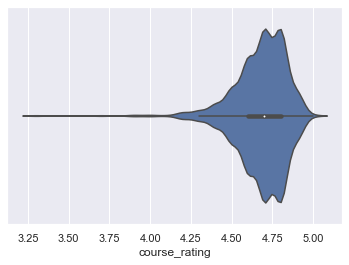

In [14]:
sns.violinplot(x="course_rating",hue="course_students_enrolled",data=df)
plt.show()

# which course title has maximum number of student?

In [15]:
df.columns

Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled'],
      dtype='object')

In [16]:
df.groupby(['course_title']).sum().nlargest(1,'course_students_enrolled')

,Unnamed: 0,course_rating,course_students_enrolled
course_title,,,
Machine Learning,187,9.5,3490000


# which organisation has minimum number of students?

In [17]:
df.groupby(['course_organization']).sum().nsmallest(1,'course_students_enrolled')

,Unnamed: 0,course_rating,course_students_enrolled
course_organization,,,
Automation Anywhere,640,4.6,2200


# is there any relation between number of students enrolled and course difficulty? if yes then name it 

In [18]:
df.columns

Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled'],
      dtype='object')

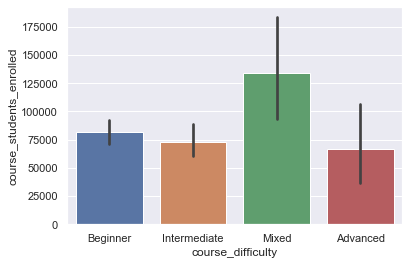

In [19]:
sns.barplot(x='course_difficulty',y='course_students_enrolled',data=df)
plt.show()

# which course and organisation is best amoung all beginner?

In [20]:
df["course_difficulty"].value_counts()

Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: course_difficulty, dtype: int64

In [21]:
new=df[(df["course_difficulty"]=="Beginner") & (df["course_Certificate_type"]=="COURSE")]

In [22]:
output=new[(new.course_rating>=4.5) & (new.course_students_enrolled>20000)]

In [23]:
output.sort_values("course_students_enrolled").tail(1)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
313,14,Financial Markets,Yale University,COURSE,4.8,Beginner,470000


so the best  course and organisation amoung all beginner is above...